In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/global_data_5k.txt")

In [22]:
fixed_column_names = ["Elev","Locrel","slope","P",'T','NDVIavg','NDVImax','y','x','ksn','tetrapods','Amphibians','Mammals','KG','Geo','LC','SR']
df.columns = fixed_column_names
df = df.replace(-9999,0)

In [23]:
print(df)

      Elev  Locrel  slope    P    T  NDVIavg  NDVImax     y      x  ksn  \
0       94     195     80  690  234        3       29  2030 -12125  102   
1      179     221     65  665  236       88      209  2078 -11705  187   
2      159     240     11  731  236       95      220  2079 -11704  114   
3      238     290     63  692  232       95      218  2078 -11704  175   
4      202     322     52  645  234       93      216  2077 -11704  255   
...    ...     ...    ...  ...  ...      ...      ...   ...    ...  ...   
4994   424     152     41  402  219      123      199  2564 -11267   85   
4995   427     171     29  407  217      127      203  2563 -11267   96   
4996   503     230     52  414  213      132      210  2562 -11267   70   
4997   580     186     57  407  210      133      215  2561 -11267   77   
4998   513     256     63  372  212      127      209  2560 -11267  114   

      tetrapods  Amphibians  Mammals  KG  Geo  LC  SR  
0            22           0        0   0   

In [24]:
from scipy.stats import pearsonr

In [32]:
geo_factors = ["Elev","Locrel","slope","P",'T','NDVIavg','NDVImax','y','x','ksn','KG','Geo','LC','SR']
species_richness = ['tetrapods','Amphibians','Mammals']

for species in species_richness:
    for factor in geo_factors:
        corr, p_value = pearsonr(df[factor], df[species])
        print(f'Pearson correlation between {factor} and {species}: {corr:.2f}')

Pearson correlation between Elev and tetrapods: -0.27
Pearson correlation between Locrel and tetrapods: -0.55
Pearson correlation between slope and tetrapods: -0.48
Pearson correlation between P and tetrapods: -0.06
Pearson correlation between T and tetrapods: 0.27
Pearson correlation between NDVIavg and tetrapods: 0.09
Pearson correlation between NDVImax and tetrapods: 0.01
Pearson correlation between y and tetrapods: -0.04
Pearson correlation between x and tetrapods: 0.50
Pearson correlation between ksn and tetrapods: -0.42
Pearson correlation between KG and tetrapods: -0.10
Pearson correlation between Geo and tetrapods: -0.30
Pearson correlation between LC and tetrapods: 0.09
Pearson correlation between SR and tetrapods: 0.00
Pearson correlation between Elev and Amphibians: -0.16
Pearson correlation between Locrel and Amphibians: -0.29
Pearson correlation between slope and Amphibians: -0.25
Pearson correlation between P and Amphibians: 0.52
Pearson correlation between T and Amphibia

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

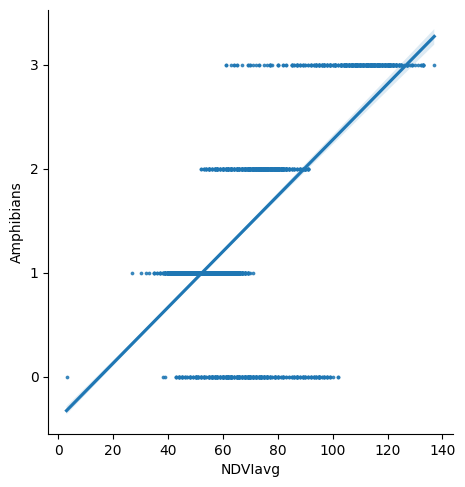

In [54]:
x_column = "NDVIavg"
y_column = "Amphibians"
plot_df = df[[x_column, y_column]]
ax = sns.lmplot(x=x_column, y=y_column, data=plot_df, scatter_kws={'s': 3})
plt.yticks(range(0, 4, 1))
plt.show()